In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [5]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = df["STATE"].unique()

for state in states:
      df.loc[df["STATE"] == state, fill_list] = df.loc[df["STATE"] == state, fill_list].interpolate()

# we drop the null values after interpolation
df.dropna(inplace=True)

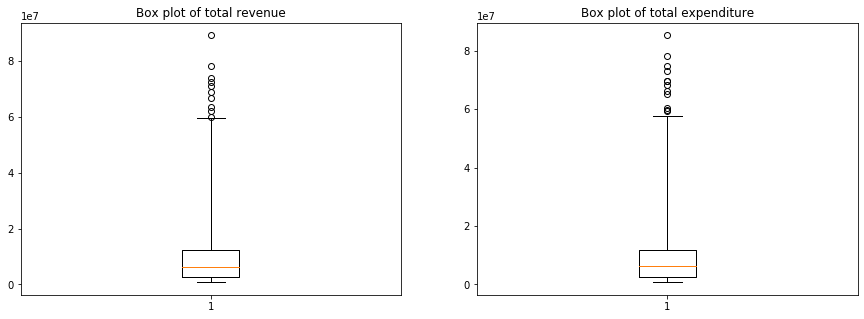

In [6]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(df["TOTAL_REVENUE"], whis = 5)
plt.title("Box plot of total revenue")

plt.subplot(1,2,2)
plt.boxplot(df["TOTAL_EXPENDITURE"], whis = 5)
plt.title("Box plot of total expenditure")
plt.show()

In [7]:
#both variables has outliers

In [8]:
#Use winsorization to eliminate the outliers and create two new variables 
#called winsorized_revenue and winsorized_expenditure for the winsorized variants.
from scipy.stats.mstats import winsorize

winsorized_revenue = winsorize(df["TOTAL_REVENUE"], (0, 0.05))

winsorized_expenditure = winsorize(df["TOTAL_EXPENDITURE"], (0, 0.05))

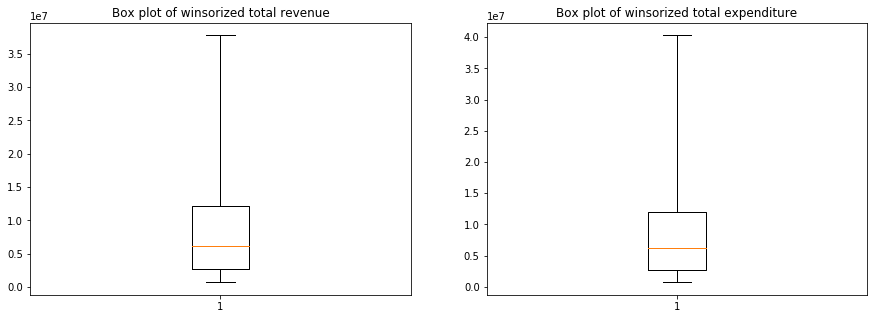

In [9]:
#let's see if the outliers has been eliminated
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(winsorized_revenue, whis = 5)
plt.title("Box plot of winsorized total revenue")

plt.subplot(1,2,2)
plt.boxplot(winsorized_expenditure, whis = 5)
plt.title("Box plot of winsorized total expenditure")
plt.show()

In [10]:
#indeed, no more outliers

In [11]:
#create a new variable where subtracted expenditure from total revenue
new_revenue = df.TOTAL_REVENUE - df.TOTAL_EXPENDITURE

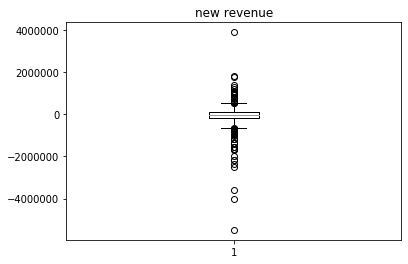

In [12]:
plt.boxplot(new_revenue)
plt.title('new revenue')
plt.show()

In [13]:
#This new dataframe has a lot of outliers on both sides
#so let's use winserizing again, but this time two-tail

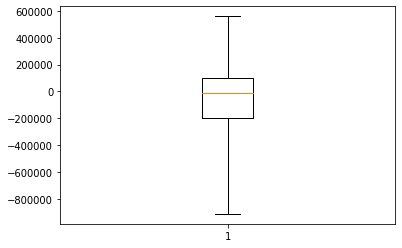

In [14]:
winsorized_new_revenue = winsorize(new_revenue, (0.05, 0.05))
plt.boxplot(winsorized_new_revenue, whis=3)
plt.show()

In [15]:
#great , there are no more outliers

# Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

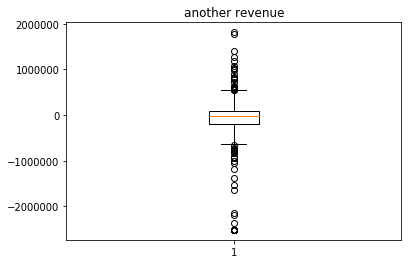

In [42]:
#first create another revenue with the winsorized data
another_revenue = winsorized_revenue - winsorized_expenditure
#then I will plot to see if there any outliers
plt.boxplot(another_revenue)
plt.title('another revenue')
plt.show()

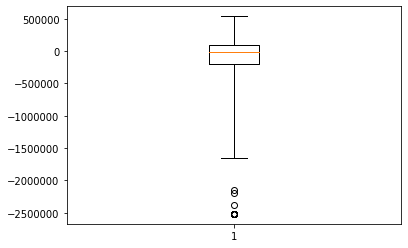

In [38]:
#yes there are outliers, on both sides, so lets winsorize them
winsorized_abother_revenue = winsorize(another_revenue, (0.05, 0.05))
#and now lets see if there is a difference
plt.boxplot(winsorized_abother_revenue, whis=5)
plt.show()

In [39]:
#well the outliers are gone again, but this time I had to set the whiskers to 8

Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

In [43]:
pd.DataFrame({"original_budget": new_revenue, "winsorizedd_new_revenue": winsorized_new_revenue,
              "winsorized_abother_revenue": winsorized_abother_revenue}).describe()

TypeError: 'int' object is not iterable

In [40]:
winsorized_new_revenue = pd.DataFrame(data=winsorized_new_revenue)
winsorized_abother_revenue = pd.DataFrame(data=winsorized_abother_revenue)

In [41]:
print(winsorized_new_revenue.describe())
print(winsorized_abother_revenue.describe())

                   0
count     466.000000
mean   -58733.012876
std    341300.816505
min   -913765.000000
25%   -196574.750000
50%     -8872.500000
75%    101394.750000
max    560511.000000
                  0
count  4.660000e+02
mean  -1.720532e+05
std    6.509561e+05
min   -2.518429e+06
25%   -2.047750e+05
50%   -1.282350e+04
75%    9.826300e+04
max    5.400550e+05


In [37]:
#Yes, they are greatly differ in means, std, and in everything 

If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

In [ ]:
# I think, 